In [91]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity

In [92]:
file = open("aktive_skills.csv")
file2 = open("po_diensts.csv")
dienste= csv.reader(file2,delimiter=",")
skills = csv.reader(file, delimiter=",")
groups = []
def contains(g, s):
    for i in s:
        res = False
        for d in g:
            if i == d:
                res = True
                break
        if not res:
            return False
    return True

for row in skills:
    s = row[0]
    s = s[1:]
    s = s[:-1]
    s = s.split(",")
    s = list(map(lambda x : int(x), s))
    groups.append(s)

dienst_mitarbeiter= []

for row in dienste:
    s = row[7]
    s = s[1:]
    s = s[:-1]
    s = list(map(lambda x : int(x), s.split(",")))
    raster = np.zeros(len(groups))
    i = 0
    for group in groups:
        if contains(group,s):
            raster[i] = 1
        i += 1
    dienst_mitarbeiter.append(raster)
S = np.array(dienst_mitarbeiter)

In [93]:
file2 = open("po_diensts.csv")
dienste= csv.reader(file2,delimiter=",")
dienste = np.array([int(row[0]) for row in dienste])
dienste_filtered = dienste[np.apply_along_axis(lambda s : max(s) ==1 ,1,S)]
S = np.transpose(S[np.apply_along_axis(lambda s : max(s) ==1 ,1,S)])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


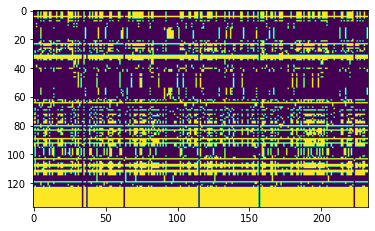

In [96]:
plt.imshow(np.transpose(S))
print(S[:,130])

In [76]:

skill_matrix = S
res = np.apply_along_axis(lambda x : np.outer(x,x),1, skill_matrix)
print( res.shape)
total_skill_count = np.sum(res,0)
total_probs = np.diag(total_skill_count)/skill_matrix.shape[0]

(233, 137, 137)


array([0.01287554, 0.43776824, 0.43776824, 0.43776824, 0.97424893,
       0.43776824, 0.01287554, 0.32188841, 0.00858369, 0.06437768,
       0.00858369, 0.06437768, 0.12446352, 0.07725322, 0.10300429,
       0.10300429, 0.10300429, 0.10300429, 0.10300429, 0.10300429,
       0.01287554, 0.32188841, 0.08154506, 0.97424893, 0.48927039,
       0.00429185, 0.48927039, 0.28755365, 0.34763948, 0.13304721,
       0.07296137, 0.97424893, 0.97424893, 0.97424893, 0.43776824,
       0.0472103 , 0.0472103 , 0.0472103 , 0.06437768, 0.06437768,
       0.28755365, 0.12446352, 0.12446352, 0.0472103 , 0.08154506,
       0.08154506, 0.0472103 , 0.08154506, 0.08154506, 0.08154506,
       0.08154506, 0.08154506, 0.08154506, 0.08154506, 0.11158798,
       0.07296137, 0.11158798, 0.06437768, 0.12017167, 0.03004292,
       0.05150215, 0.0472103 , 0.49785408, 0.23175966, 0.97424893,
       0.07725322, 0.07725322, 0.20600858, 0.07725322, 0.45922747,
       0.02575107, 0.04291845, 0.43347639, 0.27038627, 0.08154

In [116]:
mean = np.mean(total_probs)
var = np.std(total_probs)
print(mean)
print(var)

0.3573822875223207
0.3554731737252344


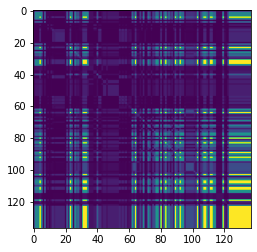

In [111]:
probs = np.array([total_skill_count[s] / S.shape[0] for s in range(total_skill_count.shape[0])])
plt.imshow(probs)

0.01726215469586099
0.03003584328101144


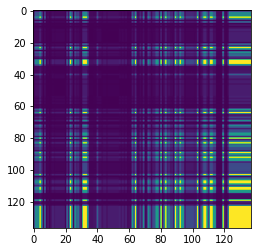

In [118]:
cov = np.cov(probs)
plt.imshow(cov)
cov_mean = np.mean(cov.flatten())
cov_std = np.std(cov.flatten())
print(cov_mean)
print(cov_std)

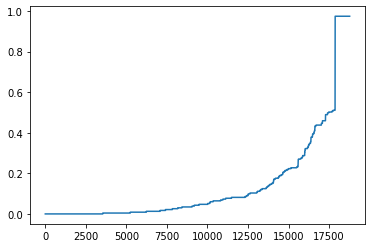

In [110]:
plt.plot(np.sort(probs.flatten()))
plt.show()

In [81]:
cov_diag = np.diag(cov)
diag_mean = np.mean(cov_diag)
diag_std = np.std(cov_diag)
print(diag_mean)
print(diag_std)

0.2201247749499223
0.041323378380018774


In [54]:
file = open("bedarf_count.csv")

bedarf = csv.reader(file, delimiter=",")
from datetime import date

d0 = date(2022, 8, 22)
d1 = date(2022, 10, 10)
delta = d1 - d0
dienstbedarf = {}
for row in bedarf:
    dienstbedarf[int(row[1])] = float(row[0])/delta.days



In [55]:

i = 0
data = []
for d in dienste_filtered:
    if d in dienstbedarf.keys():
        skill_prob = total_probs[i]
        bedarf_prob = dienstbedarf[d]
        data.append([bedarf_prob,skill_prob,d])
    i += 1
data = pd.DataFrame(data).sort_values(0)
print(data)

           0         1    2
76  0.285714  0.227468   67
17  0.285714  0.012876  122
5   0.285714  0.012876  124
27  0.326531  0.047210  162
52  0.326531  0.077253   60
..       ...       ...  ...
89  1.000000  0.090129   47
36  1.000000  0.047210  161
37  1.000000  0.081545  149
12  1.000000  0.103004  136
90  1.000000  0.188841   30

[91 rows x 3 columns]


In [67]:
bedarf_exp = np.mean(data[0])
bedarf_var = np.var(data[0])
skill_exp = np.mean(data[1])
skill_var = np.var(data[1])
print(skill_exp)
print(skill_var)


0.19784936093948968
0.025839348972624913


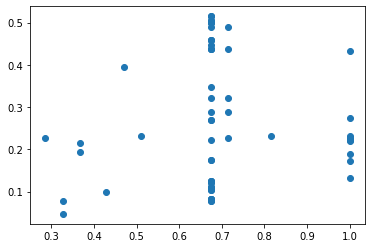

In [62]:
data[3] = data[0]/data[1]
data = data.sort_values(3)
plot = data[data[3]<9]
plt.scatter(plot[0],plot[1])
plt.show()

In [61]:
data[3] = data[0]/data[1]
data = data.sort_values(3)
print(data[data[3]<9])

           0         1    2         3
66  0.469388  0.394850   33  1.188776
76  0.285714  0.227468   67  1.256065
72  0.673469  0.515021   57  1.307653
61  0.673469  0.515021   56  1.307653
87  0.673469  0.506438   55  1.329817
..       ...       ...  ...       ...
25  0.673469  0.072961   80  9.230492
12  1.000000  0.103004  136  9.708333
11  1.000000  0.103004  134  9.708333
13  1.000000  0.103004  137  9.708333
14  1.000000  0.103004  135  9.708333

[67 rows x 4 columns]
